In [1]:
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
joined = data_wrangle.add_years_in_league(seasonal, demographic)

In [3]:
joined[joined['Seasons_number']<1]

,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Seasons_number


Text(0.5, 1.0, 'Number of Seasons Played in Data (Adjusted for Rookie Year)')

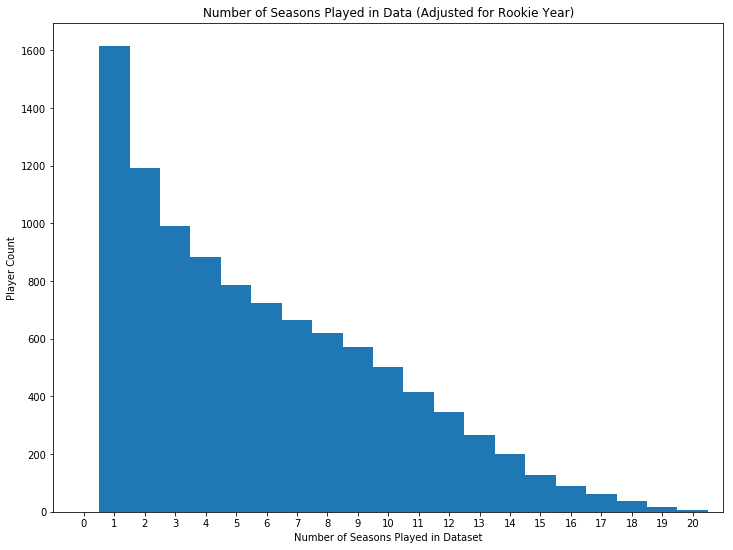

In [4]:
data = joined['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(21))
plt.xlim([-1,21])
plt.xlabel('Number of Seasons Played in Dataset')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played in Data (Adjusted for Rookie Year)')

Plot Average minutes year 4 x-axis, years in league (5-9 in y)

In [5]:
avg_min_year4 = joined.loc[joined['Seasons_number']==4,['Player','MP_pergame']]

In [6]:
avg_min_year5 = joined.loc[joined['Seasons_number']==5,['Player','MP_pergame']]
avg_min_year6 = joined.loc[joined['Seasons_number']==6,['Player','MP_pergame']]
avg_min_year7 = joined.loc[joined['Seasons_number']==7,['Player','MP_pergame']]
avg_min_year8 = joined.loc[joined['Seasons_number']==8,['Player','MP_pergame']]
avg_min_year9 = joined.loc[joined['Seasons_number']==9,['Player','MP_pergame']]

In [7]:
max_seasons_played = joined[joined['Seasons_number']>4].groupby('Player').max()['Seasons_number']

In [8]:
max_seasons_played[max_seasons_played>20]

Player
Kevin Garnett    21
Kevin Willis     23
Robert Parish    21
Name: Seasons_number, dtype: int64

In [9]:
max(max_seasons_played)

23

In [10]:
mins = avg_min_year4['MP_pergame']

In [11]:
joined[joined['Player']=='Walker Russell']

,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Seasons_number
9861,Walker Russell,PG,29,DET,28,357,7.2,0.401,0.137,0.232,...,0.3,0.7,0.9,2.1,0.6,0.0,1.2,1.0,3.0,1
